<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Diabetes-diagnosis-/blob/main/Final_Project_(_version_1_4_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In the name of God

### `Mohammad Mahdi Shafighi`
### `The Final ML Project`
###` Machine Learning lesson`
### `Winter 1403`

#important necessary libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#loading the dataframe


In [ ]:
# df = pd.read_csv('/Users/lamahamadeh/Desktop/pima_indians_diabetes/pima_indians_diabetes.txt')

# path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
# df = pd.read_csv(path)

df = pd.read_csv("/content/diabetes.csv")

# Quick Look at the Big Picture (data structure)

##checking the dataframe


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.shape

(768, 9)

##identify nans


In [ ]:
# Identify columns with potentially erroneous 0 values
zero_cols = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Iterate through the columns and replace 0s with the median or mean
for col in zero_cols:
    # Calculate the median and mean for the current column (excluding 0s)
    median_val = df[df[col] != 0][col].median()
    mean_val = df[df[col] != 0][col].mean()

    # Choose which imputation method to use (median or mean) - you can change this
    imputation_value = median_val

    # Replace 0s with the chosen imputation value
    df.loc[df[col] == 0, col] = imputation_value

In [ ]:
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1
5,5,116,74,29,125,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,29,125,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,29,125,32.3,0.232,54,1


#split the data into training and testing datasets


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X = np.array(df.drop(['Outcome'], axis = 1))
y = np.array(df['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.20,
                                                    random_state = 42)

# Initialize and train an SVM model


In [ ]:
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, y_train)

# SVM model with "RBF" kernels
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Make predictions on the test set


In [ ]:
y_pred = svm_model.predict(X_test)

# Evaluate the model


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy}")
# Accuracy of the SVM model: 0.7597402597402597   ## ---> the first result

# Second is better ( with "rbf" kernel)

Accuracy of the SVM model: 0.7662337662337663



# Initialize and train a Random Forest model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# Random Forest model
# rf_model = RandomForestClassifier(n_estimators=110, random_state=42) ## --> n_estimators = 110
# rf_model = RandomForestClassifier(n_estimators=90, random_state=42) ## --> n_estimators = 90
# rf_model = RandomForestClassifier(n_estimators=95, random_state=42) ## --> n_estimators = 95
# rf_model = RandomForestClassifier(n_estimators=200, random_state=42) ## --> n_estimators = 200
rf_model = RandomForestClassifier(n_estimators=300, random_state=42) ## --> n_estimators = 300     **
# rf_model = RandomForestClassifier(n_estimators=1000, random_state=42) ## --> n_estimators = 1000
# rf_model = RandomForestClassifier(n_estimators=500, random_state=42) ## --> n_estimators = 500
# rf_model = RandomForestClassifier(n_estimators=310, random_state=42) ## --> n_estimators = 310


rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Make predictions on the test set


In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model: {accuracy_rf}")
# Accuracy of the Random Forest model: 0.7597402597402597   ## ---> the first result

# n_estimator Changes:
## Change 1 :(n_estimators=110)  Accuracy of the Random Forest model: 0.7467532467532467
## Change 2 :(n_estimators=90)   Accuracy of the Random Forest model: 0.7532467532467533
## Change 3 :(n_estimators=95)   Accuracy of the Random Forest model: 0.7597402597402597
##                  as samev the default                              0.7597402597402597
## Change 4 :(n_estimators=200)  Accuracy of the Random Forest model: 0.7662337662337663  (growth)
## Change 5 :(n_estimators=300)  Accuracy of the Random Forest model: 0.7792207792207793  (growth more)                    **
## Change 6 :(n_estimators=1000) Accuracy of the Random Forest model: 0.7662337662337663  (decreased significantly == 200)
## Change 6 :(n_estimators=500)  Accuracy of the Random Forest model: 0.7727272727272727  (increased significantly <= 300)
## Change 6 :(n_estimators=310)  Accuracy of the Random Forest model: 0.7727272727272727  (increased significantly <= 300)


Accuracy of the Random Forest model: 0.7792207792207793


# ROC Curves and Compaire two models

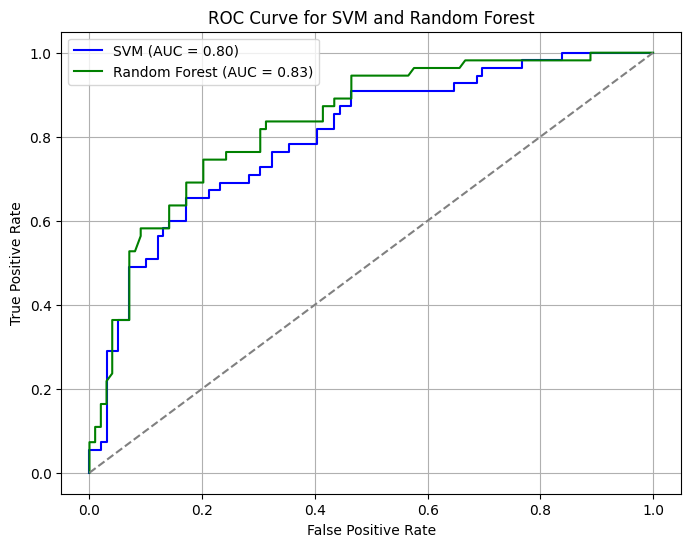

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# AUC
svm_auc = auc(svm_fpr, svm_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')

# Random geuss
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM and Random Forest')
plt.legend()
plt.grid()

plt.show()


# optimization and incrace accuracy of SVM


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Handle zero values (replace with median)


In [ ]:
zero_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    median_val = df[df[col] != 0][col].median()
    df.loc[df[col] == 0, col] = median_val

# Split data


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']  # Kernel type
}

# Create and train the SVM model with GridSearchCV for hyperparameter optimization

`24 min`


In [ ]:
svm_model = SVC(probability=True, random_state=42) #probability=True for probability estimates
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=1)

# Get the best hyperparameters and model


In [ ]:
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Make predictions


In [ ]:
y_pred = best_svm_model.predict(X_test)
svm_probs = best_svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy of the optimized SVM model: {accuracy}")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy of the optimized SVM model: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



# optimization and incrace accuracy of Random Forest


## Define the parameter grid for hyperparameter tuning


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create and train the Random Forest model with GridSearchCV for hyperparameter optimization


In [ ]:
rf_model_optimized = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model_optimized, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=1)

# Get the best hyperparameters and model


In [ ]:
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Make predictions


In [ ]:
y_pred_rf = best_rf_model.predict(X_test)
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]


# Evaluate the model


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")
print(f"Accuracy of the optimized Random Forest model: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy of the optimized Random Forest model: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



#`Confusion Matrix`

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, y_pred)

## Use a heatmap to visualize the confusion matrix


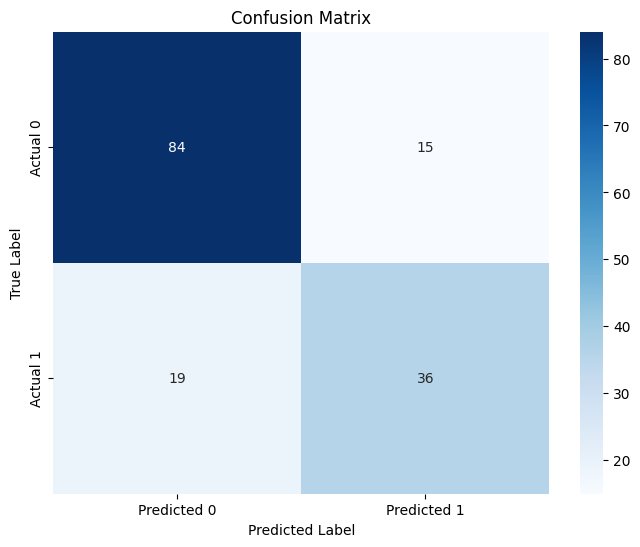

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Confusion Matrix  for Random Forest

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)


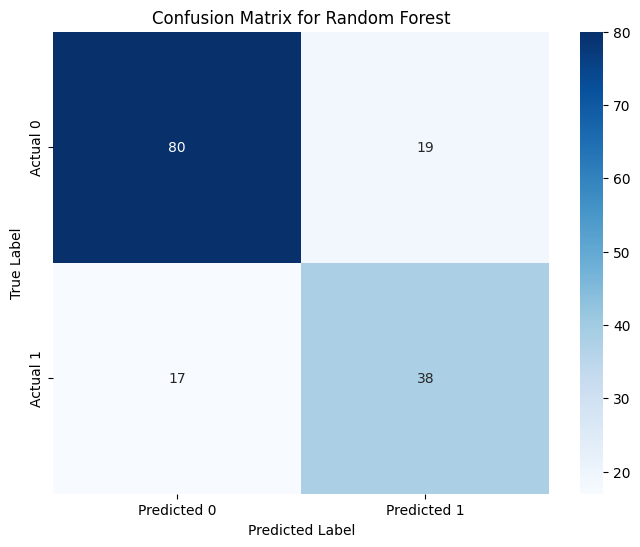

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

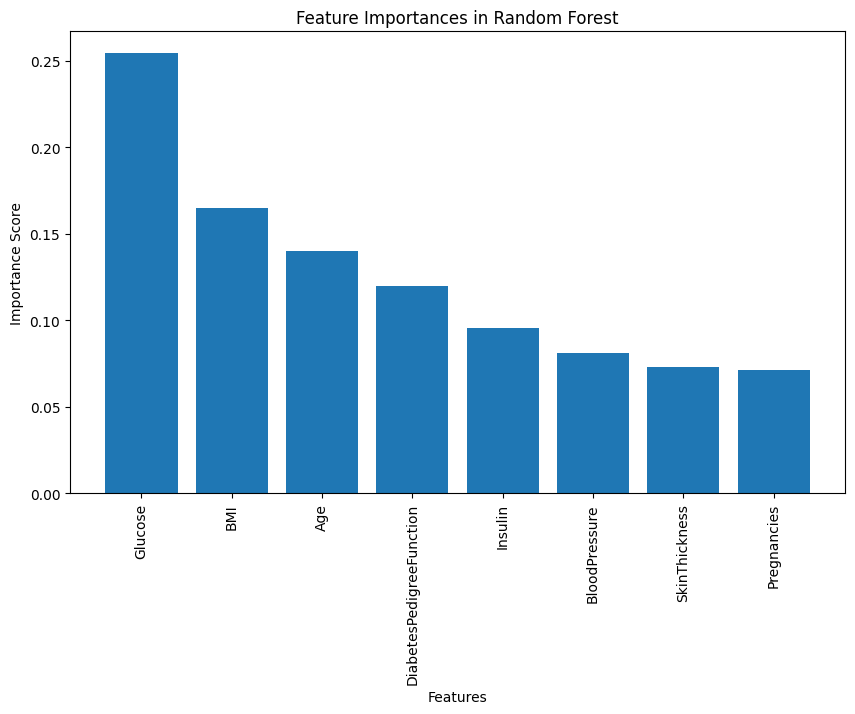

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# فرض کنیم مدل Random Forest با نام rf_model ذخیره شده است.
feature_importances = rf_model.feature_importances_
# Get feature names from the original DataFrame 'df'
feature_names = df.drop('Outcome', axis=1).columns # Access columns before conversion to numpy array


# مرتب‌سازی ویژگی‌ها بر اساس اهمیت
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()
